# **IBM STOCKS(2015-2023)**

In [28]:
%matplotlib inline
import pandas as pd
#!pip install mplfinance
!pip install mplfinance
import mplfinance as mpf
import numpy as np

In [29]:
#installing yfinance
!pip install yfinance
#importing dataset
import yfinance as yf
#reading the data
ibm_data = yf.download("IBM", start="2015-01-01", end="2023-10-09")

[*********************100%%**********************]  1 of 1 completed


In [52]:
ibm_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,154.216064,156.128113,153.919693,154.933075,105.479973,5779673
2015-01-05,154.177826,154.177826,152.189301,152.495224,103.820221,5104898
2015-01-06,152.648178,152.925430,148.346085,149.206497,101.581261,6429448
2015-01-07,150.286804,150.286804,147.256210,148.231354,100.917366,4918083
2015-01-08,149.369019,152.045883,148.709366,151.453156,103.110779,4431693
...,...,...,...,...,...,...
2023-09-29,142.000000,142.130005,139.610001,140.300003,140.300003,5703600
2023-10-02,140.039993,141.449997,139.860001,140.800003,140.800003,3275300
2023-10-03,140.869995,141.639999,140.000000,140.389999,140.389999,3284400


Closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings. Adjusted close price with closing price ends

In [31]:
print(f'Dataframe contains stock prices between {ibm_data.index.min()} {ibm_data.index.max()}')
print(f'Total Days={(ibm_data.index.max()-ibm_data.index.min()).days} days')

Dataframe contains stock prices between 2015-01-02 00:00:00 2023-10-05 00:00:00
Total Days=3198 days


In [32]:
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2205 entries, 2015-01-02 to 2023-10-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2205 non-null   float64
 1   High       2205 non-null   float64
 2   Low        2205 non-null   float64
 3   Close      2205 non-null   float64
 4   Adj Close  2205 non-null   float64
 5   Volume     2205 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 120.6 KB


All the features are in integers format.

In [53]:
ibm_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2.205000e+03
mean,136.497522,137.591121,135.404987,136.506549,111.269878,4.879060e+06
std,13.796305,13.673291,13.900554,13.791303,12.691944,2.921936e+06
min,90.439774,93.441681,86.577438,90.602295,76.025299,1.247878e+06
25%,127.779999,128.728485,126.606117,127.877632,103.384483,3.317180e+06
50%,136.319305,137.418732,135.315491,136.462708,109.124535,4.160570e+06
75%,145.697891,146.720840,144.894836,145.793503,120.237938,5.430309e+06
max,173.996170,174.751434,172.963669,173.948380,149.830002,3.981442e+07


Here we can see that the min of closing price is 79.8 and max is 136

# **DATA CLEANING**

<Axes: ylabel='Date'>

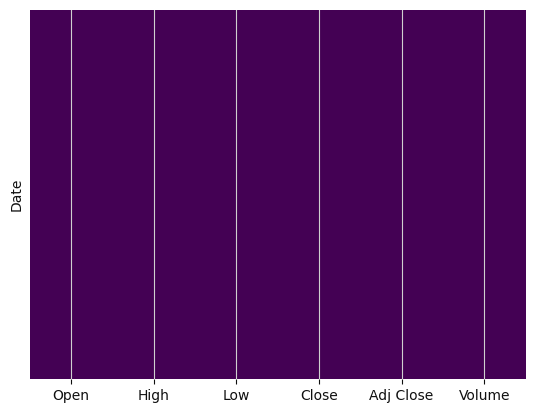

In [65]:
import seaborn as sns
sns.heatmap(ibm_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
ibm_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# **DATA VISUALIZATION**

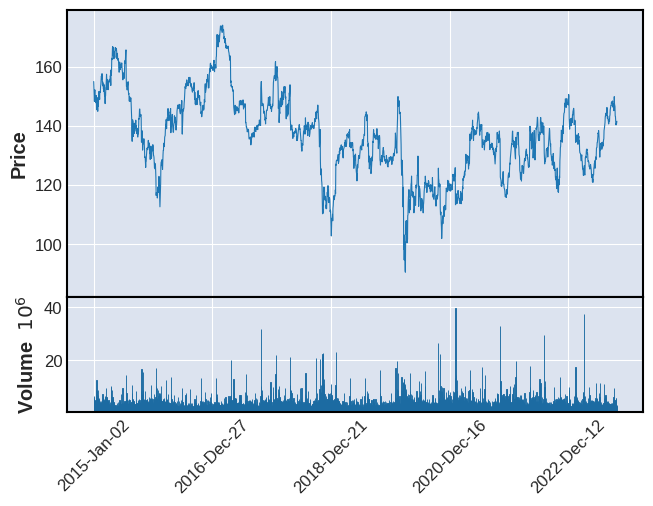

In [37]:
mpf.plot(ibm_data,type='line',volume=True)

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


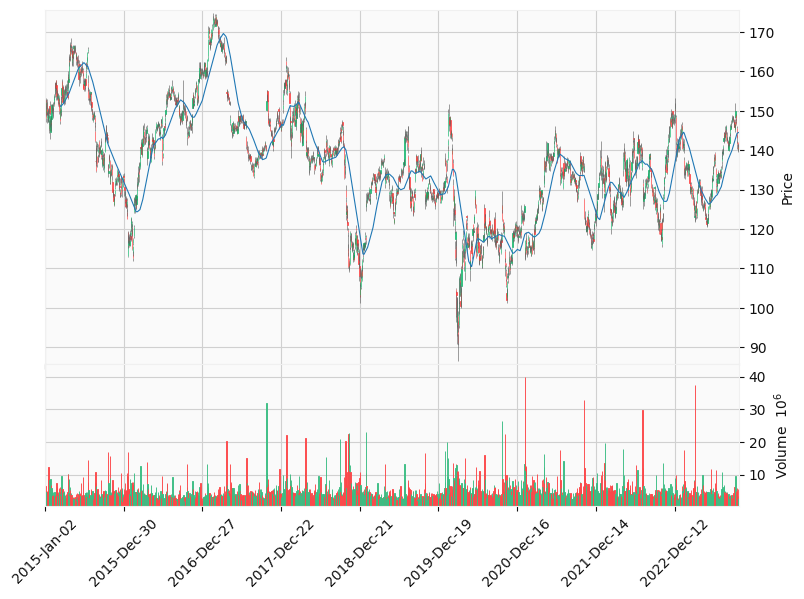

In [38]:
mpf.plot(ibm_data,type='candle',style='yahoo',mav=(50),volume=True,tight_layout=True)

The above graph is with moving average of 50

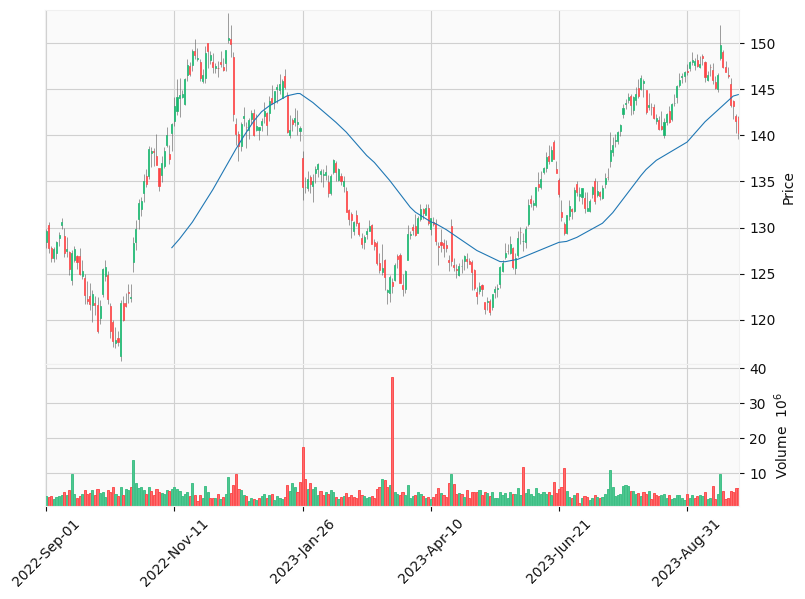

In [39]:
mpf.plot(ibm_data['2022-09':'2023-09'],type='candle',style='yahoo',mav=(50),volume=True,tight_layout=True)

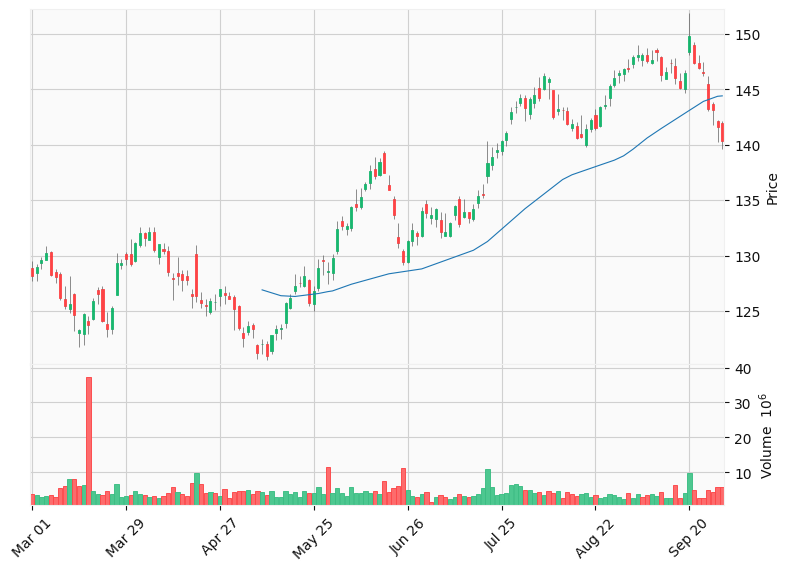

In [40]:
mpf.plot(ibm_data['2023-03':'2023-09'],type='candle',style='yahoo',mav=(50),volume=True,tight_layout=True)

Minimum Close Price is nearly $40 between march,2023 to sep,2023. Possible Reasons for This could be attributed to various factors including market volatility, changes in global economic conditions, company-specific news or events, or shifts in investor sentiment.

Maximum Close Price is nearly $158 Occurred in sept, 2023.
 Possible Reasons for This peak could be due to strong financial performance, positive industry trends, or specific company announcements of new plans.

# **STRATEGY 1**

In [54]:
x=ibm_data.copy()
x.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,154.216064,156.128113,153.919693,154.933075,105.479973,5779673
2015-01-05,154.177826,154.177826,152.189301,152.495224,103.820221,5104898
2015-01-06,152.648178,152.925430,148.346085,149.206497,101.581261,6429448
2015-01-07,150.286804,150.286804,147.256210,148.231354,100.917366,4918083
2015-01-08,149.369019,152.045883,148.709366,151.453156,103.110779,4431693


In [55]:
y = np.where(ibm_data['Adj Close'].shift(-1) > ibm_data['Adj Close'], 1, -1)
y

array([-1, -1, -1, ...,  1,  1, -1])

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

#import standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit and transform the training data
x_train = scaler.fit_transform(x_train)

#transform the test data
x_test = scaler.transform(x_test)

In [58]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


#instantiate the models
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
xgb = XGBClassifier()


#fit the models
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
svc.fit(x_train, y_train)

#training accuracies
print('KNN training accuracy: ', knn.score(x_train, y_train))
print('Random Forest training accuracy: ', rf.score(x_train, y_train))
print('Gradient Boosting training accuracy: ', gb.score(x_train, y_train))
print('Support Vector Machine training accuracy: ', svc.score(x_train, y_train))

print('\n' + '-' * 20 + '\n')

#test the models and print accuracy of the model
print('KNN accuracy: ', knn.score(x_test, y_test))
print('Random Forest accuracy: ', rf.score(x_test, y_test))
print('Gradient Boosting accuracy: ', gb.score(x_test, y_test))
print('Support Vector Machine accuracy: ', svc.score(x_test, y_test))

KNN training accuracy:  0.6842403628117913
Random Forest training accuracy:  1.0
Gradient Boosting training accuracy:  0.7624716553287982
Support Vector Machine training accuracy:  0.5544217687074829

--------------------

KNN accuracy:  0.5238095238095238
Random Forest accuracy:  0.5260770975056689
Gradient Boosting accuracy:  0.5079365079365079
Support Vector Machine accuracy:  0.5215419501133787


In [48]:
xgb.fit(x_train, np.where(y_train==-1, 0, 1))
print('XGBoost accuracy: ', xgb.score(x_test, np.where(y_test==-1, 0, 1)))

XGBoost accuracy:  0.48072562358276644


Among all KNN gave highest accuracy before tuning

# **TUNING**

Hyperparameter tuning: Using Grid Search to fing the best settings for the KNN model.


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
metrics = ['manhattan']
neighbors = np.arange(1, 16)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)
param_grid
knn = KNeighborsClassifier()
# when refit=True, it will fits the best hyperparameters to all training data
# and also allow to use GridSearchCV object as an estimator for prediction
grid= GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', refit=True)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='accuracy')

In [50]:
print('KNN accuracy: ', grid.score(x_test, y_test))
print(grid.best_params_)
print(grid.best_estimator_)

KNN accuracy:  0.5351473922902494
{'metric': 'manhattan', 'n_neighbors': 9}
KNeighborsClassifier(metric='manhattan', n_neighbors=9)


In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Assuming you have your data 'X' and target variable 'y'
model = KNeighborsClassifier()  # Replace with your actual model
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

print(f'Cross-validated accuracy: {scores.mean()}')


Cross-validated accuracy: 0.5115646258503401


In [113]:
from sklearn.model_selection import GridSearchCV
#set the parameters to be tuned
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
#instantiate the grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
#fit the grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.487 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.482 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.513 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [118]:
print('Support Vector Machine accuracy: ', grid.score(x_test, y_test))
print(grid.best_params_)
print(grid.best_estimator_)


Support Vector Machine accuracy:  0.5351473922902494
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


# **STRATEGY 2**

In [62]:
y= np.where(x['Adj Close'].rolling(50).mean() > x['Adj Close'].rolling(200).mean(), 1, 0)
y

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
np.unique(y)

array([0, 1])

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

#fit and transform the training data
x_train = scaler.fit_transform(x_train)

#transform the test data
x_test = scaler.transform(x_test)

#fit the models
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
svc.fit(x_train, y_train)
xgb.fit(x_train, y_train)


#test the models and print accuracy of the model
print('KNN accuracy: ', knn.score(x_test, y_test))
print('Random Forest accuracy: ', rf.score(x_test, y_test))
print('Gradient Boosting accuracy: ', gb.score(x_test, y_test))
print('Support Vector Machine accuracy: ', svc.score(x_test, y_test))
print('XGBoost accuracy: ', xgb.score(x_test, y_test))


KNN accuracy:  0.8390022675736961
Random Forest accuracy:  0.8843537414965986
Gradient Boosting accuracy:  0.8390022675736961
Support Vector Machine accuracy:  0.7664399092970522
XGBoost accuracy:  0.8775510204081632


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


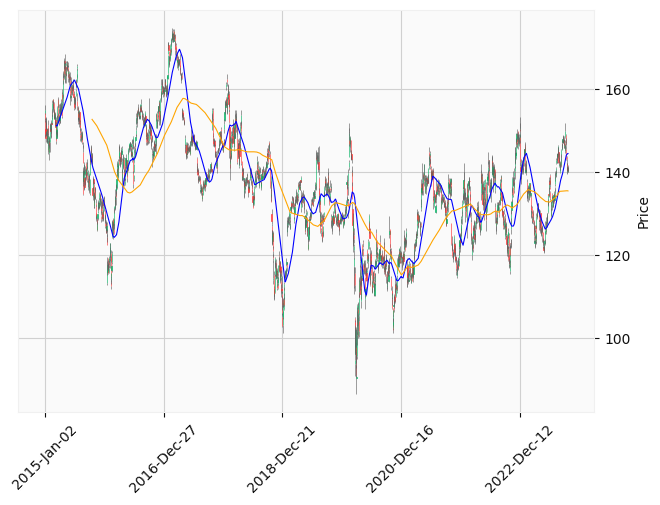

In [ ]:
import mplfinance as mpf

# Assuming you have already loaded your data into df with 'Date' as the index and 'Adj Close' column

# Calculate Moving Averages
df['50_MA'] = df['Adj Close'].rolling(window=50).mean()
df['200_MA'] = df['Adj Close'].rolling(window=200).mean()

# Plotting
mpf.plot(df, type='candle', style='yahoo', mav=(50, 200), mavcolors=('blue', 'orange'))

A bullish crossover in early 2020 indicating an upward trend.
A bearish crossover in mid 2022 signaling the start of a downward trend.
The 50 MA staying below the 200 MA from mid 2022 through 2023 shows the continuation of the downtrend.
Attempted bullish crossover in Sept 2023 could suggest downtrend is ending.


random forest accuracy had the highest accuracy before tuning at around 87%.

# **TUNING**

In [ ]:
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 4, 5, 6,7], 'n_estimators': [100, 200, 300, 400, 500]}
#instantiate the grid search
grid = GridSearchCV(XGBClassifier(), param_grid, refit=True, verbose=3)
#fit the grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.720 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.734 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.739 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.762 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.787 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.728 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.745 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.748 total time=   2.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.779 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [ ]:
print('XGBoost accuracy: ', grid.score(x_test, y_test))
#print the best parameters
print(grid.best_params_)
print(grid.best_estimator_)

XGBoost accuracy:  0.8684807256235828
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


These results indicate that the XGBoost model achieved a reasonably good accuracy on the test data, and the hyperparameters (learning_rate, max_depth, and n_estimators) that were selected as the best are the ones that led to this performance.